<a href="https://colab.research.google.com/github/zahraDehghanian97/ASR_Vosk/blob/master/Persian_ASR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.0 MB/s eta 0:00:00


In [1]:
# Install dependencies
!pip install wget pydub wave tqdm vosk
!apt-get ffmpeg

# Download Vosk model
!mkdir models
!wget -P models/ https://alphacephei.com/vosk/models/vosk-model-fa-0.5.zip
!unzip models/vosk-model-fa-0.5.zip -d models/ && rm models/vosk-model-fa-0.5.zip

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 56.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.6 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=24715810be3a0d61a3999a04a8fed2560dfd4ad5aac7f304aea4b8026710ad24
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
  Created wheel for wave: filename=Wave-0.0.2-py3-none-any.whl size=1220 sha256=ba9fcaa3ef78cf93a0ccacbe11840787e6b0c4cf10c0083001abf4555ecb9233
  Stored in directory: /root/.cache/pip/wheels/f8/24/4d/1b01c0e32da3eb3fd71bbbc6093fcc557ec3b2d9e532ecd65d
  Created wheel for srt: filename=srt-3.5.3-py3-none-any.whl size=22428 sha256=bdac880749d18b6256f5aa540ab3b98518d853324f2f1810101371247b50fcf7
  Stored in directory: /root/.cache/pip/wheels/d7/31/a1/18e1e7e8bfdafd1

# 1. Convert mp3 to wave format

In [17]:
from pydub import AudioSegment
import os

def mp3_to_wav(source, skip=0, excerpt=False):

    sound = AudioSegment.from_mp3(source) # load source
    sound =  sound.split_to_mono()[1] # sound.set_channels(1) ## mono
    sound = sound.set_frame_rate(16000) # 16000Hz

    if excerpt:
        excrept = sound[skip*1000:skip*1000+30000] # 30 seconds - Does not work anymore when using skip
        output_path = os.path.splitext(source)[0]+"_excerpt.wav"
        excrept.export(output_path, format="wav")
    else:
        audio = sound[skip*1000:]
        output_path = os.path.splitext(source)[0]+".wav"
        audio.export(output_path, format="wav")

    return output_path

In [18]:
wave_file = mp3_to_wav('/content/Sample.mp3',0,False) # please specify here the path to your mp3 file

# 2. Transcribe audio

In [19]:
from vosk import Model, KaldiRecognizer, SetLogLevel
from tqdm.notebook import tqdm
import wave
import os
import json

def transcript_file(input_file, model_path):

    # Check if file exists
    if not os.path.isfile(input_file):
        raise FileNotFoundError(os.path.basename(input_file) + " not found")

    # Check if model path exists
    if not os.path.exists(model_path):
        raise FileNotFoundError(os.path.basename(model_path) + " not found")

    # open audio file
    wf = wave.open(input_file, "rb")

    # check if wave file has the right properties
    if wf.getnchannels() != 1 or wf.getsampwidth() != 2 or wf.getcomptype() != "NONE":
        raise TypeError("Audio file must be WAV format mono PCM.")

    # Initialize model
    model = Model(model_path)
    rec = KaldiRecognizer(model, wf.getframerate())

    # Get file size (to calculate progress bar)
    file_size = os.path.getsize(input_file)

    # Run transcription
    pbar = tqdm(total=file_size)

    # To store our results
    transcription = []

    while True:
        data = wf.readframes(4000) # use buffer of 4000
        pbar.update(len(data))
        if len(data) == 0:
            pbar.set_description("Transcription finished")
            break
        if rec.AcceptWaveform(data):
            # Convert json output to dict
            result_dict = json.loads(rec.Result())
            # Extract text values and append them to transcription list
            transcription.append(result_dict.get("text", ""))

    # Get final bits of audio and flush the pipeline
    final_result = json.loads(rec.FinalResult())
    transcription.append(final_result.get("text", ""))

    transcription_text = ' '.join(transcription)

    return transcription_text

In [20]:
hypothesis = transcript_file(wave_file, '/content/models/vosk-model-fa-0.5')

  0%|          | 0/15075692 [00:00<?, ?it/s]

In [21]:
print(hypothesis)

حالا کیا ساموئل رفتیم بذار ببین چیه این یکی دوم اینکه توی همین تبصره یک می گوید که شورای اسلامی شهرها موظف اند و ببند درصدی از درآمد شهرداری چون بحث حریمم حذف تبصره در واگذاری به دهیاری ها رو هم به اصطلاح هلو در بر میگیره این بحث عوارض فرومنگنز نمایید رحمانی توضیح می دهد لابی بالا را یا چیزی نوع نیازمندی و چه جون دو زمینه های انصاری قرار بچه های اصلاحاتی که گفتیم اعمال می‌کنیم کیک و آبی روشن کنی چون میگه چایی نظر شود برای منابع چون منابع دولتی رو که نمیشه داد عبارت کمک های فنی اعتباری اگر بنویسم قانون علاوه بر اعتبارات مربوط یعنی اعتبارات و بالاخره هست اعتبارات راننده به شهد و خودشون باید هزینه کند ولی تبدیل به کمک می‌کنند می‌توانند انجام بدهند کمک به همون اعتبارات نه کمک های فنی اعتباری به جای اعتبارات بگذاریم که محل کمک های فنی اعتباری داری آقای مونسان آیتم ما اینجا فکر میکنم بیشتر مربوط به تحصیلات کف صندوق توسعه می‌گیریم اینم شامل کمکش نهادم و نقش نقشه مطلب خوبیم افزایش پیشنهاد نه فقط اونجا با موکل نفس مجاز وصل بشه از تسهیلات صندوق توسعه بدون در شهرداریها قرار بدیم خب الان موکلف اثب

In [23]:
#remove redundant punctuation mark and refrences
import re
import string

def generate_plain_text(refrence):
  # Open the input file
  with open(refrence, 'r') as file:
      text = file.read()
  # Remove terms between square brackets
  text = re.sub(r'\[.*?\]', '', text)
  # Remove all punctuation marks
  text = text.translate(str.maketrans('', '', string.punctuation))
  # Remove extra spaces
  text = ' '.join(text.split())
  # Open the output file and write the cleaned text
  with open('output.txt', 'w') as file:
      file.write(text)
  return text

In [24]:

reference = generate_plain_text("Sample.txt")
print(reference)


حالا هر چه هست همان اضافه بگذارید ببینیم چیست؟ این یکی، دوم هم اینکه در همین تبصره یک می گوید که شوراهای اسلامی شهرها موظفند و بعد درصدی از درامد شهرداری، چون بحث حریم هم هست در تبصره دو دهیاری ها را هم به اصطلاح دربرمی گیرد، این بحث عوارض حالا من نمی دانم آقای رحمانی توضیح می دهند لابد بله حالا اگر چیزی نیاز به توضیح باشد، ایشان توضیح می دهند آقای انصاری در قسمت ابتدای تبصره، دو نوع تملک و واگذاری اشاره شده آقای جهانگیری قسمت اولش در واقع به شهرداری اجازه داده برود تملک کند بناهای تاریخی را که به تأیید میراث فرهنگی رسیده در قسمت دومش گفته میراث فرهنگی می تواند واگذار کند خیلی خوب، حالا پس شما این اصلاحاتی را که گفتید، اعمال می کنیم نامفهوم چی؟ روشن کنید؛ چون اینطوری که می گویید، هیچ فایده ندارد برای آن منابع، چون منابع دولتی را که نمی شود داد، عبارت کمک های فنی، اعتباری اگر بنویسند، قانوناً می توانند نه، نوشته از محل اعتبارات مربوط، یعنی اعتباراتش بالاخره هست اعتبارات را نه به شهردار خودشان باید هزینه کنند، ولی تبدیل به کمک بکنند، می توانند انجام بدهند کجا کمک کنند؟ همان اعتبارات را ب

In [25]:
import jiwer
wer = jiwer.wer(reference, hypothesis)
print(wer)

0.6847479259731972


In [29]:
! pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.6/731.6 kB 5.9 MB/s eta 0:00:00


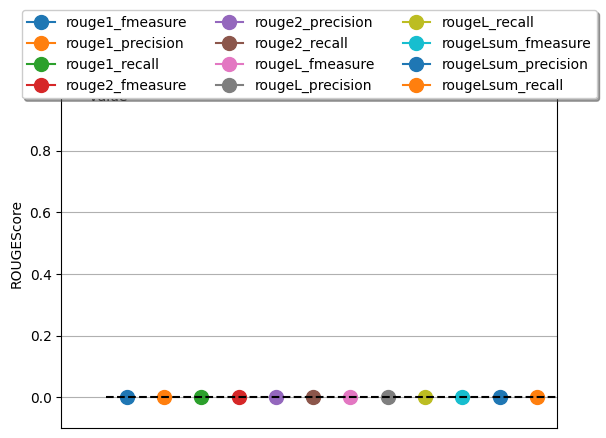

In [31]:
from torchmetrics.text.rouge import ROUGEScore
metric = ROUGEScore()
metric.update(reference, hypothesis)
fig_, ax_ = metric.plot()

In [28]:
from nltk.translate.bleu_score import corpus_bleu
# Calculate BLEU score
bleu_score = corpus_bleu([reference], [hypothesis])
print("BLEU Score:", bleu_score)


BLEU Score: 5.1381393936048914e-232


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_